**Zomato Data Analysis Project**

**Importing the liberaries**

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Create Dataframe**

In [4]:
df = pd.read_csv('Zomato data .csv')

In [5]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


**Converting the data type of column - rate**

In [6]:
def rates(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(rates)
print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


**Type of resturant customers prefer**

In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


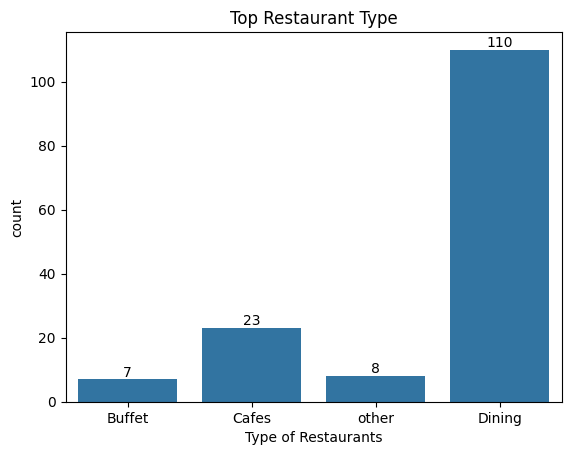

In [9]:
ax=sns.countplot(x=df['listed_in(type)'] )
plt.xlabel("Type of Restaurants")
for i in ax.containers:
    ax.bar_label(i)
# or instead of for loop , we can use : ax.bar_label(ax.containers[0])
plt.title("Top Restaurant Type")
plt.show()


***Conclusion : Dining restaurants are preferred by a large number of individuals.***

**How many votes has each type of restaurant received from customers?**

In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
print(grouped_data)

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


In [12]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data}).reset_index()
print(result)

  listed_in(type)  votes
0          Buffet   3028
1           Cafes   6434
2          Dining  20363
3           other   9367


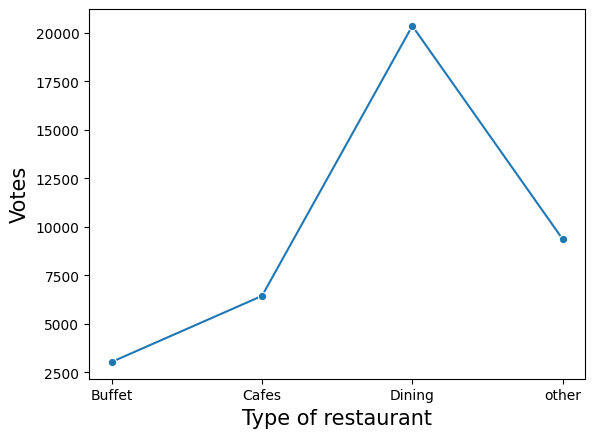

In [13]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data}).reset_index()
sns.lineplot(x='listed_in(type)' , y='votes' , data=result , marker="o")
plt.xlabel("Type of restaurant", size=15)
plt.ylabel("Votes",size=15)
plt.show()

***Conclusion:Dining type of Restaurant is top voted restaurant***

**What are the ratings that the majority of restaurants have received?**

In [15]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


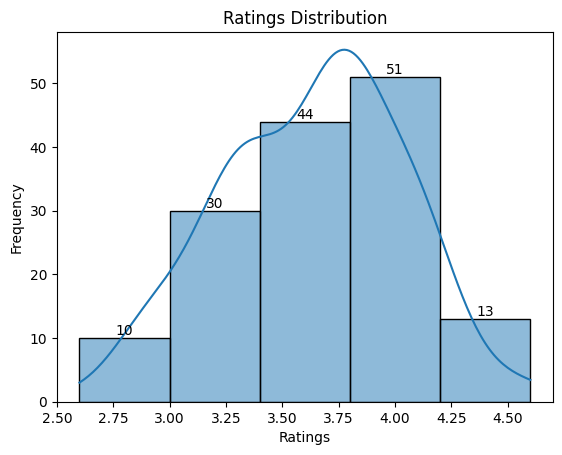

In [27]:
hist = sns.histplot(df['rate'], bins=5 , kde=True)# Adjust the number of bins if necessary
for a in hist.containers:
    hist.bar_label(a)
plt.title("Ratings Distribution",)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()


***Conclusion:Majority of restaurants recieved ratings ranging from 3.5 to 4***

**Average order spending by couples**

In [28]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


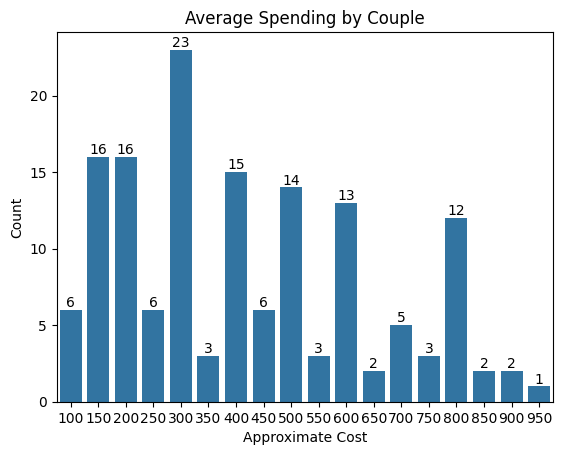

In [31]:
b=sns.countplot(x='approx_cost(for two people)',data =df)
for i in b.containers:
    b.bar_label(i)
plt.title("Average Spending by Couple")
plt.xlabel("Approximate Cost")
plt.ylabel("Count")
plt.show()

***Conclusion:The majority of the couples prefer restaurants with an approximate cost of 300 rupees***

**Which Payment mode (online or offline) has received the maximum rating**

In [32]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


<Axes: xlabel='online_order', ylabel='rate'>

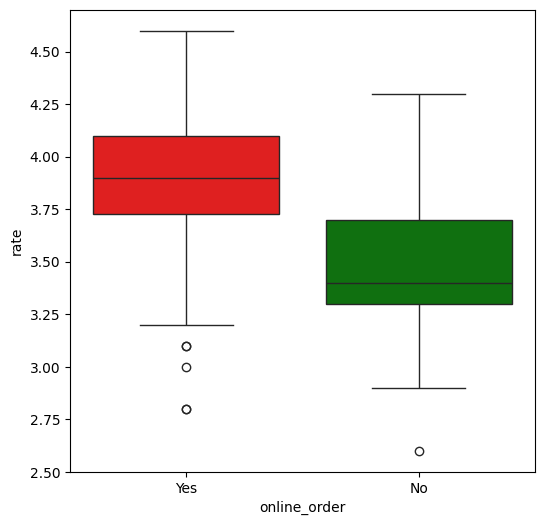

In [37]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order' , y = 'rate' , hue='online_order', data = df , palette=['red' , 'green'] )

***Conclusion:Offline orders recieved lower ratings in comparison to online orders , which obtained excellent ratings.***

**Which type of restaurant received more offline orders, so that Zomato can provide those 
customers with some good offers**

In [38]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


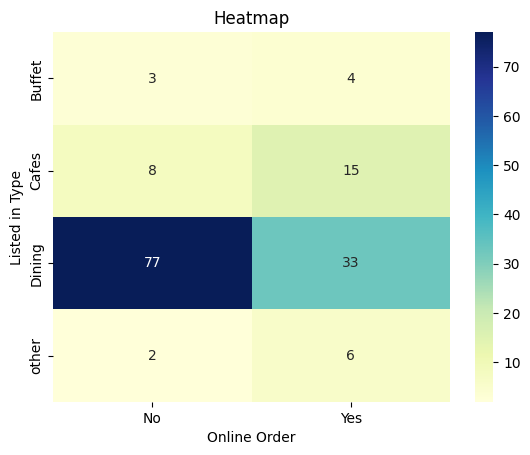

In [40]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size' ,fill_value = 0)
sns.heatmap(pivot_table , annot = True ,cmap="YlGnBu" , fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in Type")
plt.show()

***Conclusion: Dining restaurants primarily accept offline orders, although they also receive a significant number of online orders. Cafes, on the other hand, rank second in terms of online orders. This indicates that clients tend to prefer placing orders in person at restaurants, while they favor online orders when it comes to cafes.***